In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
x_train = train.drop('label', axis = 1)
y_train = train['label']

In [3]:
train.shape

(42000, 785)

In [4]:
test.shape

(28000, 784)

In [5]:
import matplotlib.pyplot as plt

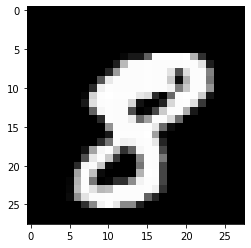

In [6]:
plt.imshow(np.array(x_train.iloc[10]).reshape(28, 28),cmap='gist_gray')

In [7]:
learning_rate = 0.001 # To adjust the cost function
training_epoches = 15
batch_size = 100

In [12]:
n_classes = 10
n_samples = train.shape[0]
n_input = 784

In [13]:
n_hidden_1 = 256
n_hidden_2 = 256

In [14]:
def multilayer_perceptron(x, w, b):
    # First hidden layer
    layer_1 = tf.add((tf.matmul(x, w['h1'])), b['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer
    layer_2 = tf.add((tf.matmul(x, w['h2'])), b['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last output layer
    out_layer = tf.matmul(layer_2, w['out']) + b['out']
    
    return out_layer

In [21]:
w = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_classes]))}

In [22]:
b = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_classes]))}

In [28]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder('float', [None, n_input])
y = tf.compat.v1.placeholder('float', [None,n_classes])

In [30]:
tf.compat.v1.disable_eager_execution()
prediction = multilayer_perceptron(x, w, b)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(prediction, y))
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

RuntimeError: Attempting to capture an EagerTensor without building a function.

In [33]:
sess = tf.compat.v1.InteractiveSession()

In [36]:
init = tf.initialize_all_variables().run()

AttributeError: module 'tensorflow' has no attribute 'initialize_all_variables'

In [38]:
tf.keras.datasets.mnist

<module 'tensorflow_core.keras.datasets.mnist' from '/Users/rtavakoli20/miniconda3/envs/newenv/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>